# <font color=blue> Lending Club Case Study

## <font color=green> Problem Statement

- In consumer finance company specialises in lending of loans. 


- When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 


- Two types of risks are associated with the bank’s decision:
    1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


- The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. 


- <font color=brown>***The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate***</font> 

## <font color=green> Analysis

- The analysis is divided into following parts:
    1. Data understanding 
    2. Data cleaning 
    3. Data Analysis 

## <font color=green> Data understanding

In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Increasing maximum number of columns and rows displayed
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
#Using "low memory" flag to load columns with multiple data types
loan = pd.read_csv("loan.csv", low_memory=False)

In [4]:
#Checking top 5 entries of the dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
#Lower rows of data frame
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
#shape of data frame
loan.shape

(39717, 111)

In [8]:
# Looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## <font color=green> Data Cleaning

### <font color= brown>Dealing with Missing values</font>

In [9]:
# summarising number of missing values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
#Finding percentage of null or missing values
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [11]:
#Removing columns which has more than 50% null values in it.
loan.drop(null_perc[ null_perc > 50 ].index, axis=1, inplace=True)

In [12]:
#Finding number of unique values in each vcolumn
loan.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
collections_12_mths_ex_med     1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
dtype: int64

***First 9 columns have only one unique value in all the rows, which will not give any usefull info for us so we can remove those***

In [13]:
#Dropping Columns with only one value
loan.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [14]:
#Finding number of unique values, printing high unique valued columns
loan.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
title              19615
installment        15383
dtype: int64

*** "emp_title", and "title" columns have text values which are more unique values ***

In [15]:
loan.drop(['emp_title', 'title'], axis=1, inplace=True)

***"id", "url", and "member_id" having all unique values which means any one of these can be used as primary key. Let's use "id" primary key and remove url and member id columns***

In [16]:
loan.drop(['member_id', 'url'], axis=1, inplace=True)

- **total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv** variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed.
- **recoveries, collection_recovery_fee** columns are only valid for charged off loans.
- Will removed these colomns.

In [17]:
loan.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)

In [18]:
loan.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [19]:
#Finding percentage of null or missing values
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_perc[ null_perc > 0 ]

emp_length               2.71
desc                    32.58
revol_util               0.13
pub_rec_bankruptcies     1.75
dtype: float64

***Removing the the null valued rows in the above columns.***

In [20]:
loan.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [21]:
#Finding percentage of null or missing values
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_perc[ null_perc > 0 ]

desc    32.92
dtype: float64

- **Loan Status** Column has 3 distict values out of them we need only **_Fully Paid_** and **_Charged Off_**
- So, we will remove the rows with **_Current_ values** in loan status.

In [22]:
#Removing current loan status rows
loan = loan[loan.loan_status != 'Current']

In [23]:
#Checking unique values for term column
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

***There is empty space at the start of values. Let's remove it.***

In [24]:
#Stripping empty space in values in term
loan['term'] = loan.term.str.strip()
loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [25]:
print(loan.shape)

(36800, 32)


### <font color= brown>Data Type Conversions

In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36800 non-null  int64  
 1   loan_amnt             36800 non-null  int64  
 2   funded_amnt           36800 non-null  int64  
 3   funded_amnt_inv       36800 non-null  float64
 4   term                  36800 non-null  object 
 5   int_rate              36800 non-null  object 
 6   installment           36800 non-null  float64
 7   grade                 36800 non-null  object 
 8   sub_grade             36800 non-null  object 
 9   emp_length            36800 non-null  object 
 10  home_ownership        36800 non-null  object 
 11  annual_inc            36800 non-null  float64
 12  verification_status   36800 non-null  object 
 13  issue_d               36800 non-null  object 
 14  loan_status           36800 non-null  object 
 15  desc               

In [27]:
# Finding datatype in all coulmns
loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
desc                     object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_

- **int_rate** and **revol_util** are having '%' symbol values and having data type of object.
- Let's remove % at the end and convert to float

In [28]:
#stripping '%' value
loan['int_rate'] = loan.int_rate.str.strip('%').astype(float)
loan['revol_util'] = loan.revol_util.str.strip('%').astype(float)

- **issue_d** and  **earliest_cr_line** are having date values
- lets convert column data type to date.

In [29]:
#converting to date type
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')

In [30]:
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
loan['issue_d'] = loan['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)
loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [31]:
# Converted to proper datatypes for analysis
loan.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
desc                            object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                

- Let's create new columns from date type columns

In [32]:
#issue_d column
loan['issue_d_year'] = loan.issue_d.dt.year
loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')
loan['issue_d_weekday'] = loan.issue_d.dt.weekday

In [33]:
#data type conversion of year and weekday
loan['issue_d_year'] = loan['issue_d_year'].astype(object)
loan['issue_d_weekday'] = loan['issue_d_weekday'].astype(object)

In [34]:
#earliest_cr_line
loan['earliest_cr_line_year'] = loan.earliest_cr_line.dt.year
loan['earliest_cr_line_month'] = loan.earliest_cr_line.dt.strftime('%b')

In [35]:
#data type conversion of year and weekday
loan['earliest_cr_line_year'] = loan['earliest_cr_line_year'].astype(object)

***Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount***

In [36]:
loan['approved_loan_amnt_ratio'] = round(loan.funded_amnt_inv*100/loan.loan_amnt,2)

In [37]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_ratio
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0,2011,Dec,3,1985,Jan,99.5
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0,2011,Dec,3,1999,Apr,100.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,NaN,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0,2011,Dec,3,2001,Nov,100.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0,2011,Dec,3,1996,Feb,100.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,NaN,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0,2011,Dec,3,2004,Nov,100.0


In [38]:
# Extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [39]:
# Converted date formats for analysis
loan.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                           int64
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
desc                                object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc   

## <font color=green> Data Analysis

### <font color= brown>Univariate Analysis

#### Loan Amount

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


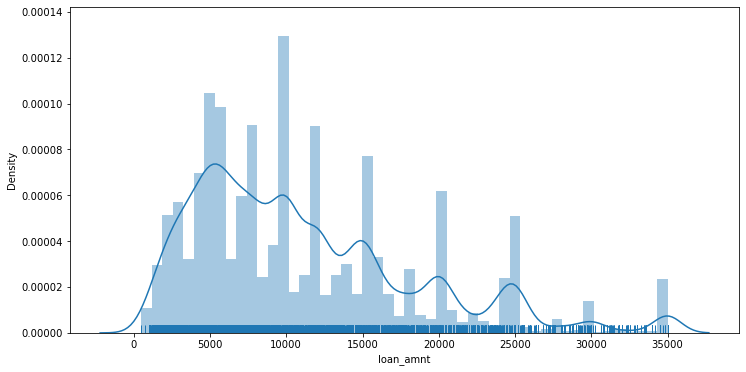

In [40]:
#Increasing the figure size of plot
plt.figure(figsize=(12,6))

#Histogram plot
sns.distplot(a=loan.loan_amnt, rug=True);
plt.show()

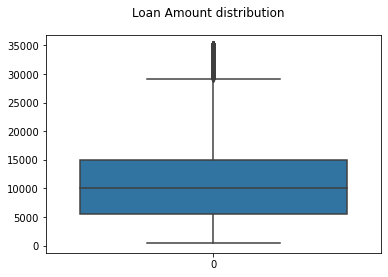

In [41]:
#Box plot
sns.boxplot(data=loan.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [42]:
#Stats of laon amount
loan.loan_amnt.describe()

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<font color=green>**Observations**:</font>
- From the above plots, more number of people took loan amount of 10000, and also median of distribution is 10000.
- Very few people(25%) took more than 15000 loan amount.

#### funded_amnt

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


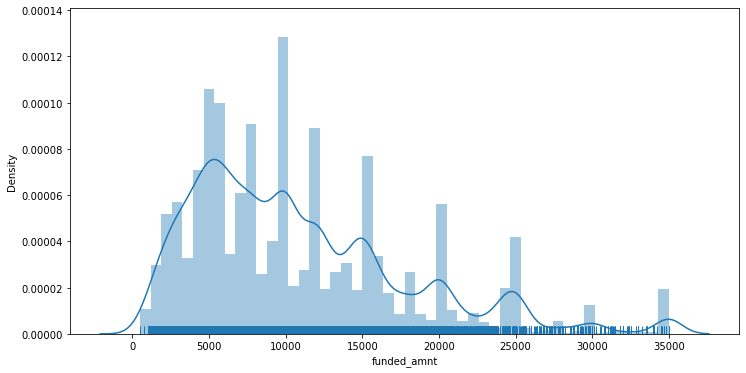

In [43]:
plt.figure(figsize=(12,6))
sns.distplot(a=loan.funded_amnt, rug=True)
plt.show()

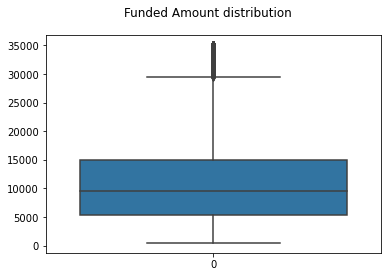

In [44]:
sns.boxplot(data=loan.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [45]:
loan.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36800.000000
mean     10880.794837
std       7109.157574
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
90%      20375.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

<font color=green>**Observations**:</font>
- Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.

#### funded_amnt_inv
- The total amount committed by investors for that loan at that point in time.

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


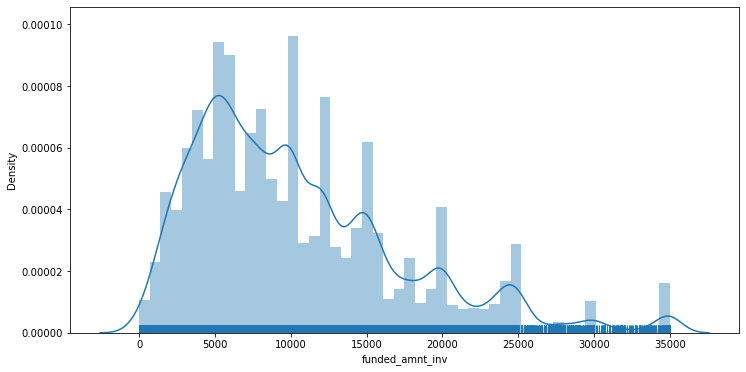

In [46]:
plt.figure(figsize=(12,6))
sns.distplot(a=loan.funded_amnt_inv, rug=True)
plt.show()

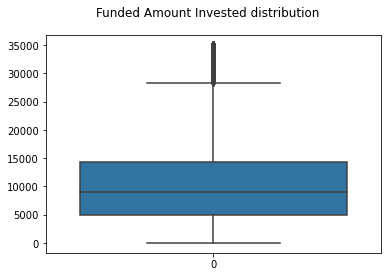

In [47]:
sns.boxplot(data=loan.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [48]:
loan.funded_amnt_inv.describe()

count    36800.000000
mean     10439.055845
std       7008.522880
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

<font color=green>**Observations**:</font> 
- Funded amount investment data behaves similar to loan Amount, Which tells us that Lending club approved atmost of Applied loan amount.

#### Approved Loan Amount Ratio

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


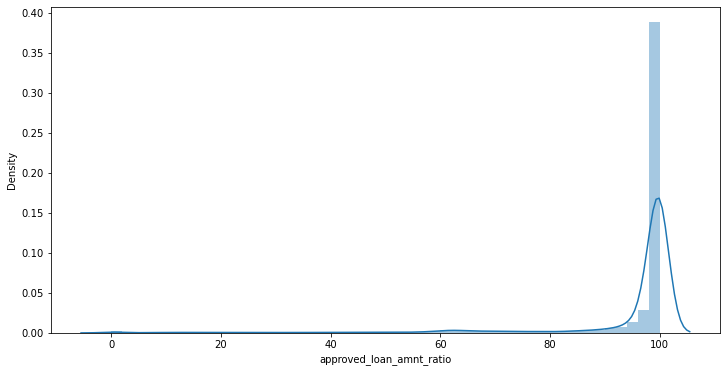

In [49]:
plt.figure(figsize=(12,6))
sns.distplot(a=loan.approved_loan_amnt_ratio)
plt.show()

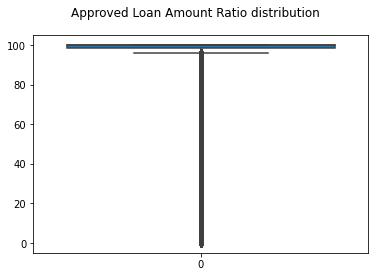

In [50]:
sns.boxplot(data=loan.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

**Observations**:
- 70% of Borrowers got 100% loan amount from investors.

#### Interest Rate

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


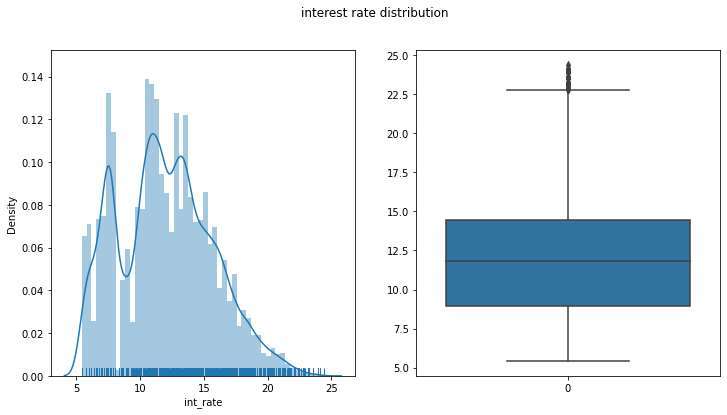

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(a=loan.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

**Observations**-
- Most of the interest rates lies between **9% to 14.5%**
- Some people took loan at higher rates of interest that is above **22.5%**

#### Installment
- The monthly payment owed by the borrower if the loan originates.

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


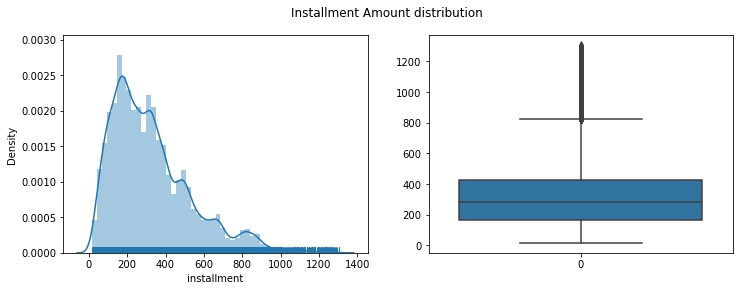

In [52]:
installment = loan.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

**Observations**:
- The Most representative value of Installment amount in around 270.

#### annual_inc
- The self-reported annual income provided by the borrower during registration.

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


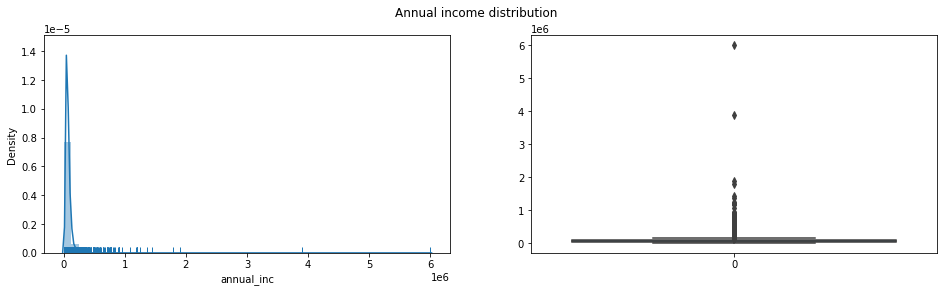

In [53]:
flag = loan.annual_inc
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=flag, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=flag)
plt.suptitle('Annual income distribution')
plt.show()

**Observations**:
- Around 361 people are having more the 235000 annual income. and 99% of people are having incomes below 235000.

#### dti
- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


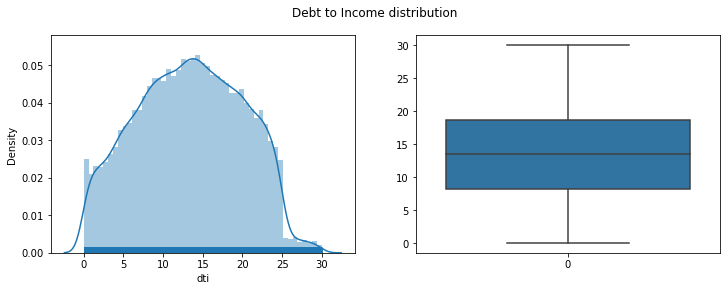

In [54]:
flag = loan.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=flag, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=flag)
plt.suptitle('Debt to Income distribution')
plt.show()

**Observations**:
- Looks like there are no outliers and the distribution is very much similar to normal distribution.
- This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

#### Pub rec
- Number of Public derogatory records

Text(0.5, 1.0, 'pub_rec Distribution')

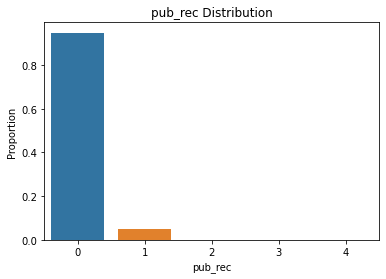

In [55]:
flag = 'pub_rec'
#Probability / Percentage of each values
prob_df = loan[flag].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=flag, data=prob_df)
plt.xlabel(flag)
plt.ylabel('Proportion')
plt.title(flag+' Distribution')

**Observations**
- Around 90% borrower's are having no public derogatory records.

#### issue_d - Loan issue date

Text(0.5, 1.0, 'issue_d_year Distribution')

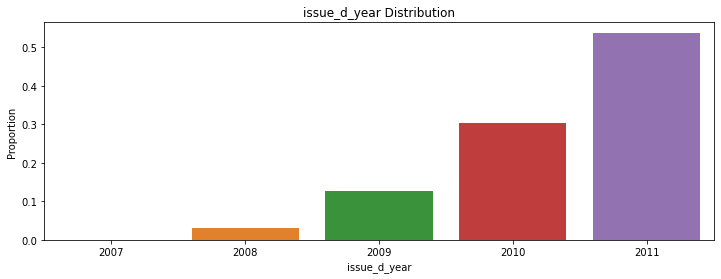

In [56]:
flag = 'issue_d_year'

#Probability / Percentage of each values
prob_df = loan[flag].value_counts(normalize=True).reset_index()

plt.figure(figsize=(12,4))
sns.barplot(x='index', y=flag, data=prob_df)
plt.xlabel(flag)
plt.ylabel('Proportion')
plt.title(flag+' Distribution')

Text(0.5, 1.0, 'issue_d_month Distribution')

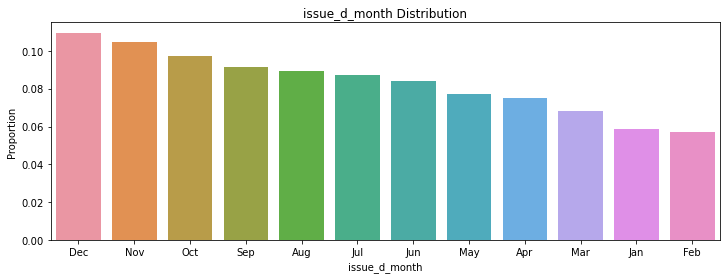

In [57]:
flag = 'issue_d_month'
#Probability / Percentage of each values
prob_df = loan[flag].value_counts(normalize=True).reset_index()
plt.figure(figsize=(12,4))
sns.barplot(x='index', y=flag, data=prob_df)
plt.xlabel(flag)
plt.ylabel('Proportion')
plt.title(flag+' Distribution')

Text(0.5, 1.0, 'issue_d_weekday Distribution')

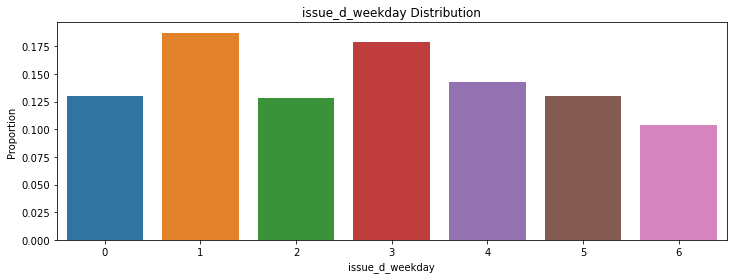

In [58]:
flag = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = loan[flag].value_counts(normalize=True).reset_index()
plt.figure(figsize=(12,4))
sns.barplot(x='index', y=flag, data=prob_df)
plt.xlabel(flag)
plt.ylabel('Proportion')
plt.title(flag+' Distribution')

**Observations**:
- The lending club(LC) has doubling loan issues every year
- There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec
- LC has issued more loans on tuesday and wednessday than other week days.

#### Term

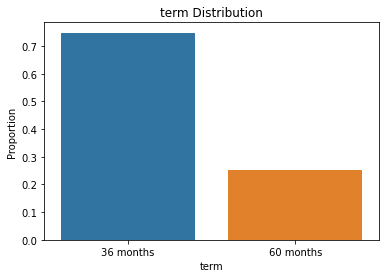

In [59]:
term = 'term'
#Probability / Percentage of each values
prob_df = loan[term].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=term, data=prob_df)
plt.xlabel(term)
plt.ylabel('Proportion')
plt.title(term+' Distribution')
plt.show()

**Observations**:
- Borrowers have taken 36 months tenure more than 60 months.

#### Grade

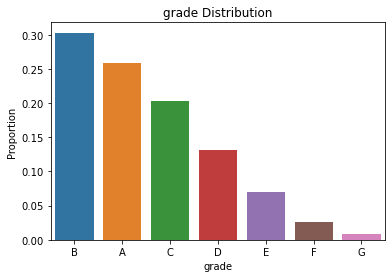

In [60]:
grade = 'grade'
#Probability / Percentage of each values
prob_df = loan[grade].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=grade, data=prob_df)
plt.xlabel(grade)
plt.ylabel('Proportion')
plt.title(grade+' Distribution')
plt.show()

**Observations**:
- Most borrowers fall under A and B grades then other grades

#### Employment length

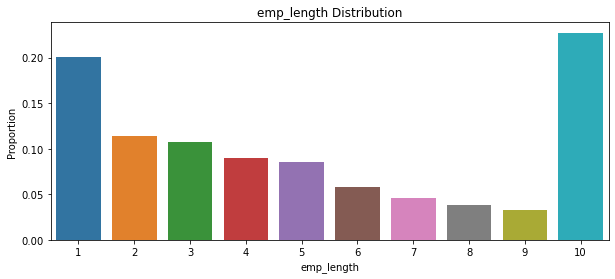

In [61]:
plt.figure(figsize=(10,4))
empl = 'emp_length'
#Probability / Percentage of each values
prob_df = loan[empl].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=empl, data=prob_df)
plt.xlabel(empl)
plt.ylabel('Proportion')
plt.title(empl+' Distribution')
plt.show()

**Observations**:
- Borrowers are mostly 10+ years emploment length.

#### Home Ownership

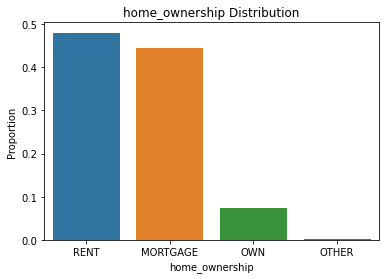

In [62]:
ho_ow = 'home_ownership'
#Probability / Percentage of each values
prob_df = loan[ho_ow].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=ho_ow, data=prob_df)
plt.xlabel(ho_ow)
plt.ylabel('Proportion')
plt.title(ho_ow+' Distribution')
plt.show()

**Observations**:
- The loan borrowers are mostly having rented and mortgage houses.

#### Verification Status

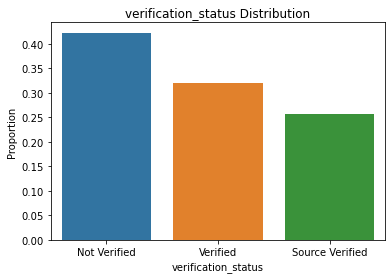

In [63]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:
- Majority of loans were given without verification of applicants income.

#### Loan Status

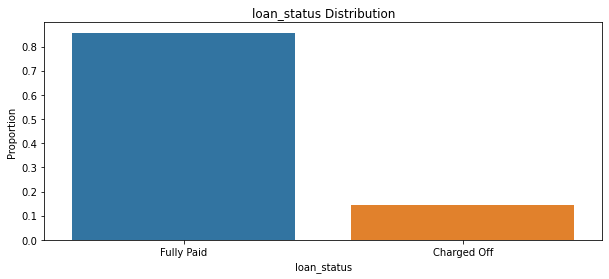

In [64]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:
- 85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

#### Purpose

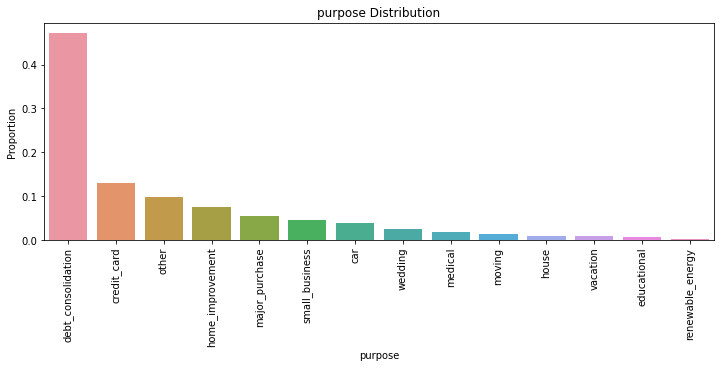

In [65]:
plt.figure(figsize=(12,4))
pur = 'purpose'
#Probability / Percentage of each values
prob_df = loan[pur].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=pur, data=prob_df)
plt.xlabel(pur)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(pur+' Distribution')
plt.show()

**Observations**:
- Looks line more number of people took loan for _debt consolidation_ and a very few people took for _renewable energy_


#### Borrower's State (add_state)

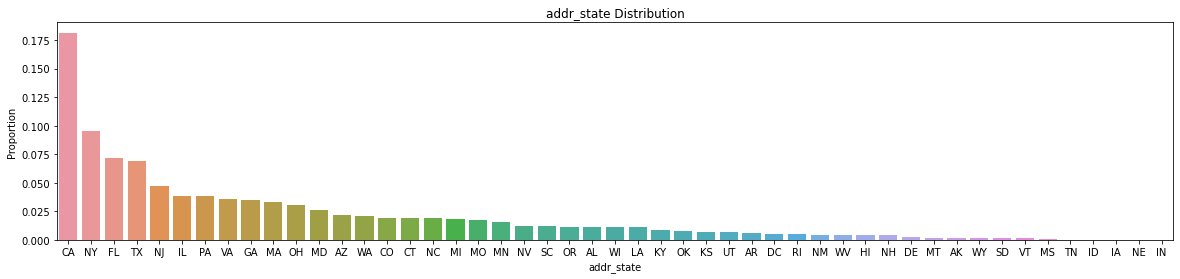

In [66]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:
- Most of the borrowers are from _CA_ and _NY_

### <font color= brown> Segmented Univariate Analysis

#### Loan Amount

Text(0.5, 1.0, 'Terms vs Loan Amount')

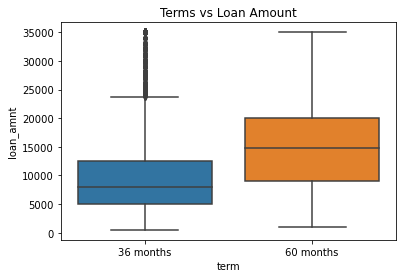

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(x='term', y=loan.loan_amnt, data=loan)
plt.title('Terms vs Loan Amount')

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

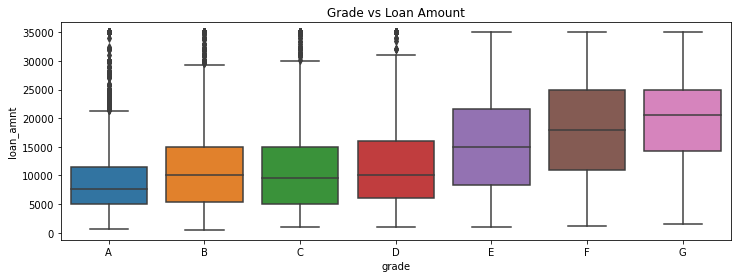

In [68]:
plt.figure(figsize=(12,4))
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.loan_amnt, order = grade_ord, data=loan)

**Observations**:
- Higher amount loans have high tenure i.e, 60 months.  
- Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

Text(0.5, 1.0, 'loan_status vs Loan Amount')

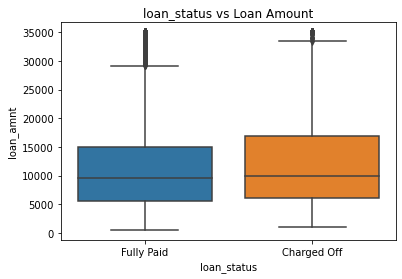

In [69]:
sns.boxplot(x='loan_status', y=loan.loan_amnt, data=loan)
plt.title('loan_status vs Loan Amount')

**Observations**:<br>
- Charged Off loans have higher amounts than Fully Paid ones.

#### int_rate

<AxesSubplot:title={'center':'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

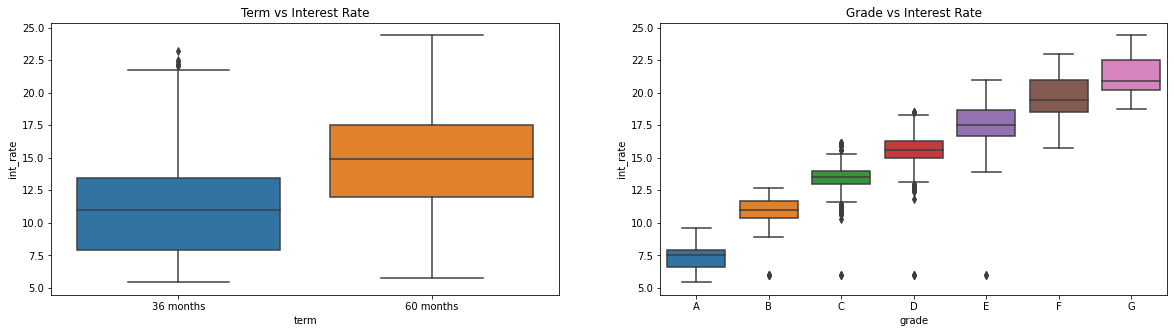

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.int_rate, data=loan)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.int_rate, order = grade_ord, data=loan)

**Observation**:  
- The interest rates are higher for Higher tenure loans.  
- And Also Interest Rates are Higher as Grades are Lowering (A to G).

<AxesSubplot:title={'center':'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

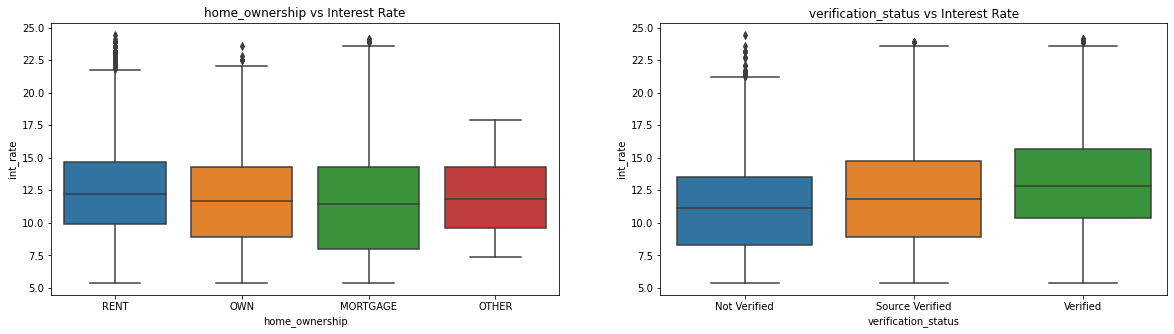

In [71]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.int_rate, data=loan)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.int_rate, order = verification_status_ord, data=loan)

**Observations**:  
- Barrowers with Own and Mortgage got loans with less interest rates as the security will be there.  
- And The Non Verified Barrowers got less interest rates compared to Verified and Source Verified barrowers.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

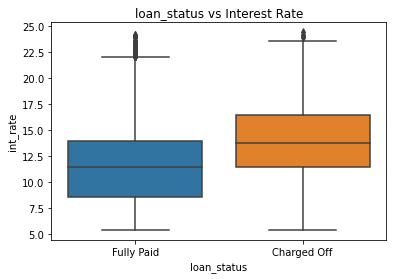

In [72]:
sns.boxplot(x='loan_status', y=loan.int_rate, data=loan)
plt.title('loan_status vs Interest Rate')

**Observations**:  
- This clearly tells us, grater the interest rate more the chance of Defaulting the loan.

#### annual_inc

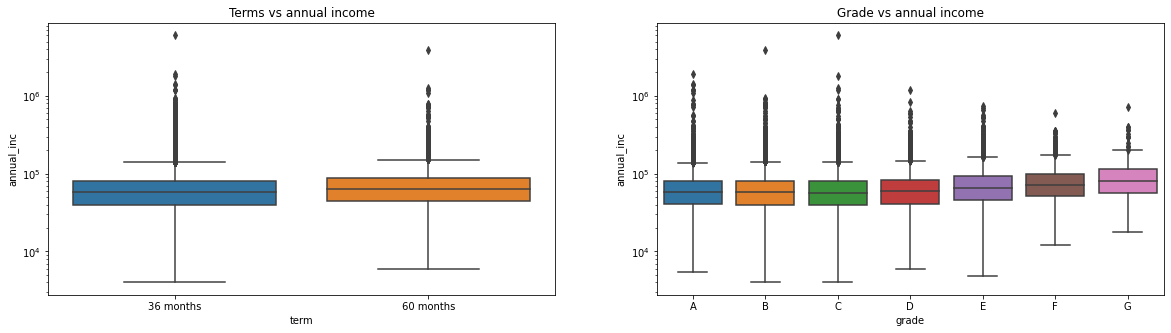

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.annual_inc, data=loan)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.annual_inc, order = grade_ord, data=loan)
plt.yscale('log')

**Observations:**  
Comparatively Annual income is higher for lower grades.

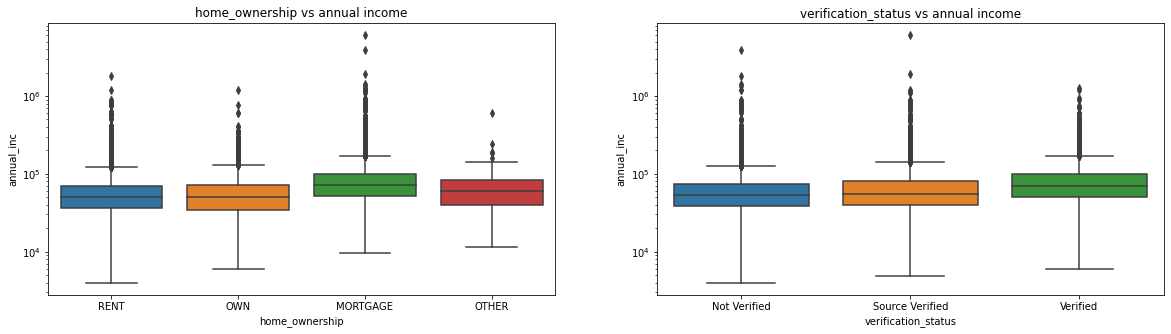

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.annual_inc, data=loan)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.annual_inc, order = verification_status_ord, data=loan)
plt.yscale('log')

**Observations:**  
- The home ownership status for MORTAGE has higher income.  
- The income source was verfied for most of the borrower's who had higher annual incomes.

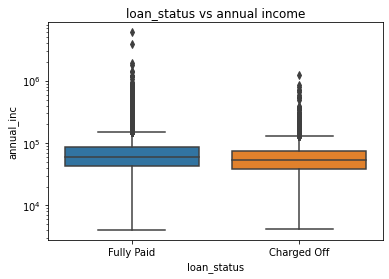

In [75]:
sns.boxplot(x='loan_status', y=loan.annual_inc, data=loan)
plt.title('loan_status vs annual income')
plt.yscale('log')

**Observations:**    
- Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.  

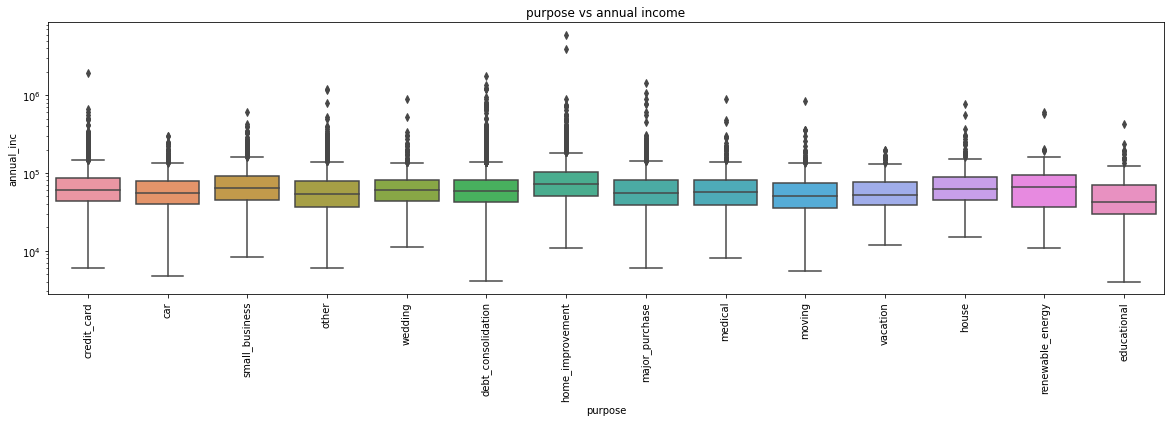

In [76]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.annual_inc, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

**Observations:**  
- A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request. 


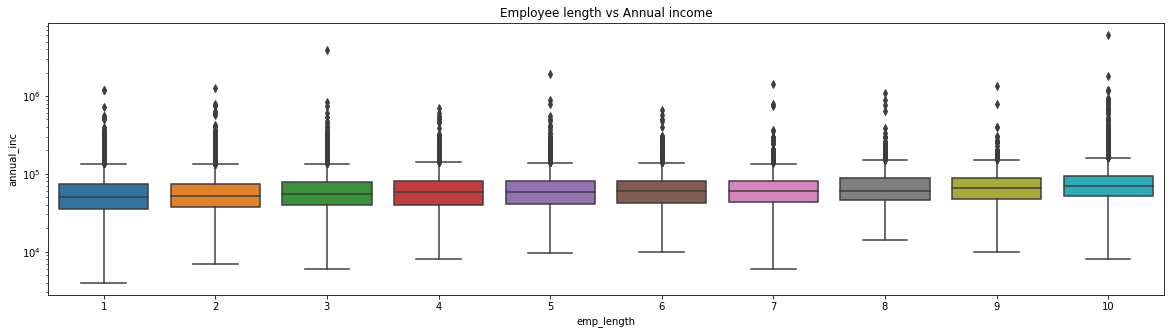

In [77]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.annual_inc, data=loan)
plt.title('Employee length vs Annual income')
plt.yscale('log')

**Observations:**  
- The borrower's who has higer income have taken loans for 10+ years of duration.

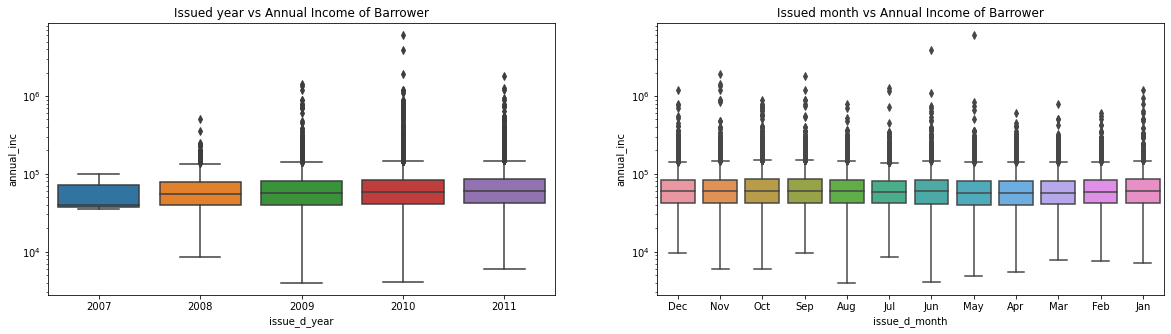

In [78]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan.issue_d_year, y=loan.annual_inc, data=loan)
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=loan.issue_d_month, y=loan.annual_inc, data=loan)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

**Observations:**  
- Annual income has no impact with the month when the loan was funded

#### DTI
- Debt to Income Ratio

<AxesSubplot:title={'center':'Grade vs dti'}, xlabel='grade', ylabel='dti'>

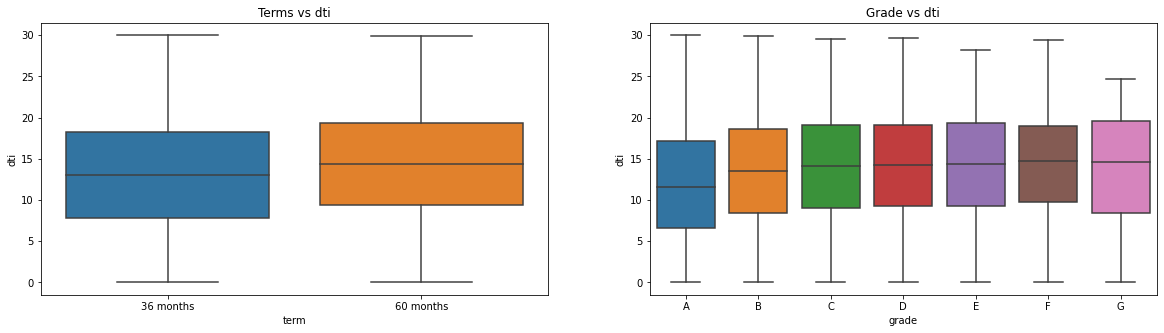

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.dti, data=loan)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.dti, order = grade_ord, data=loan)

**Observation**:   
- DTI is bit high for people who got more tenure i.e., 60 months.  
- A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

<AxesSubplot:title={'center':'verification_status vs dti'}, xlabel='verification_status', ylabel='dti'>

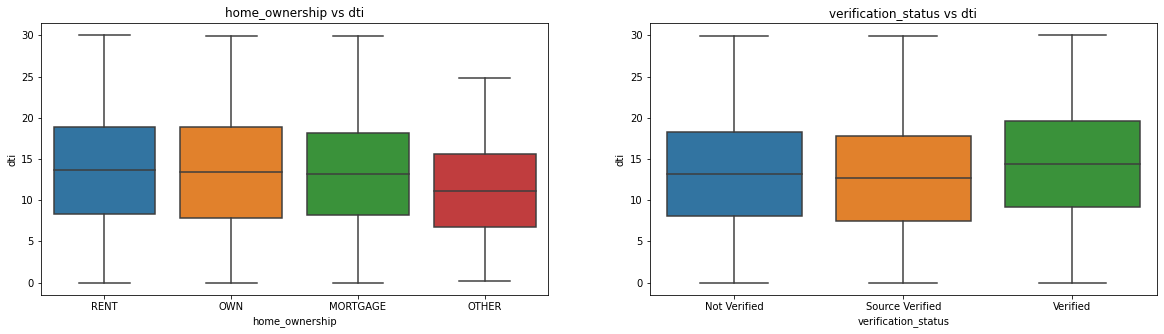

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.dti, data=loan)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.dti, order = verification_status_ord, data=loan)

**Observations**:  
- People in Other home ownership has less DTI than others. This is may be bacause other people have mortgage and home loans.

Text(0.5, 1.0, 'loan_status vs dti')

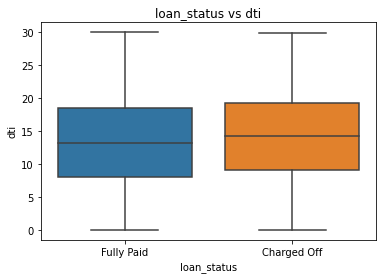

In [81]:
sns.boxplot(x='loan_status', y=loan.dti, data=loan)
plt.title('loan_status vs dti')

**Observations**  
- Borrowers with high DTI has bit more probability to default

Text(0.5, 1.0, 'purpose vs dti')

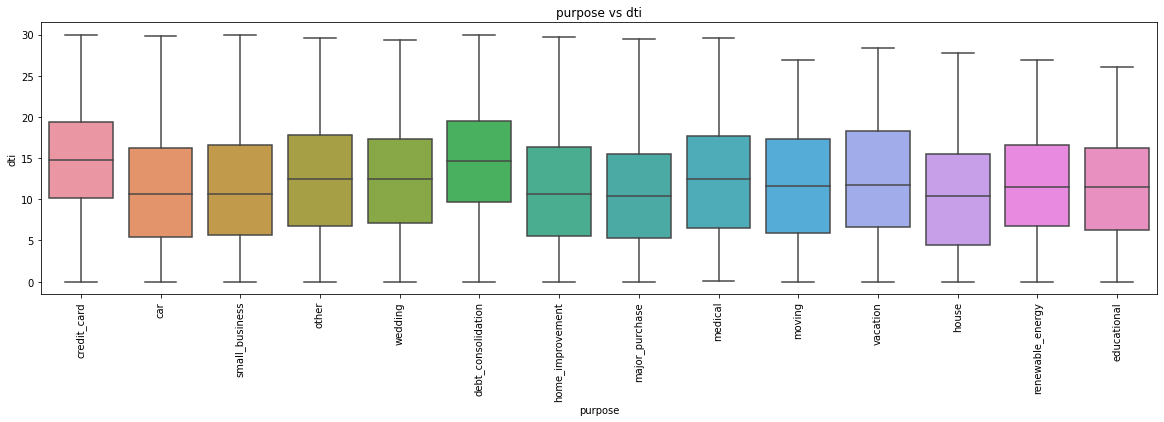

In [82]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.dti, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

**Observations**:  
- People who took loan for _credit card_ and _debt consolidation_ purpose has more DTI than other purposes.

Text(0.5, 1.0, 'emp_length vs dti')

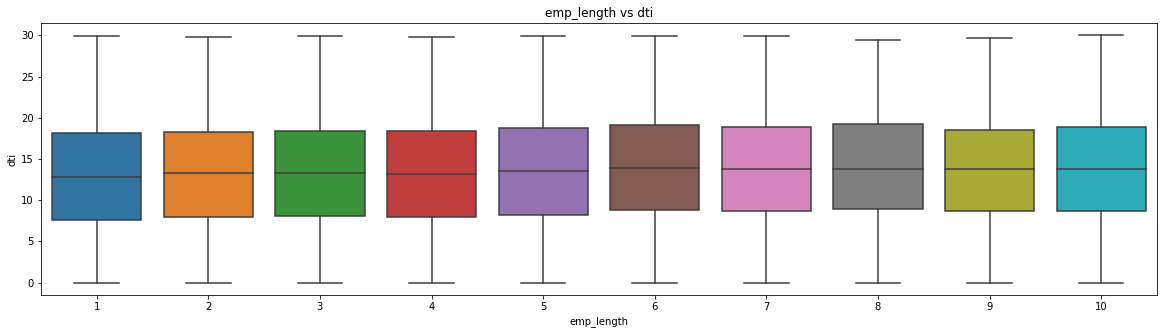

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.dti, data=loan)
plt.title('emp_length vs dti')

**Observations**:   
- The dti is pretti much similar for barrowers with all the employment length.

#### pub_rec
- Number of derogatory public records

In [84]:
#Finding proportation of values in each value of category
df = loan.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

C:\Users\adity\AppData\Local\Temp/ipykernel_10128/471407637.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


,pub_rec,term,id,proportion
0,0,36 months,26152,0.749964
1,0,60 months,8719,0.250036
2,1,36 months,1349,0.719467
3,1,60 months,526,0.280533
4,2,36 months,36,0.800000
5,2,60 months,9,0.200000
6,3,36 months,7,1.000000
7,4,36 months,2,1.000000


C:\Users\adity\AppData\Local\Temp/ipykernel_10128/3548263525.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
C:\Users\adity\AppData\Local\Temp/ipykernel_10128/3548263525.py:10: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


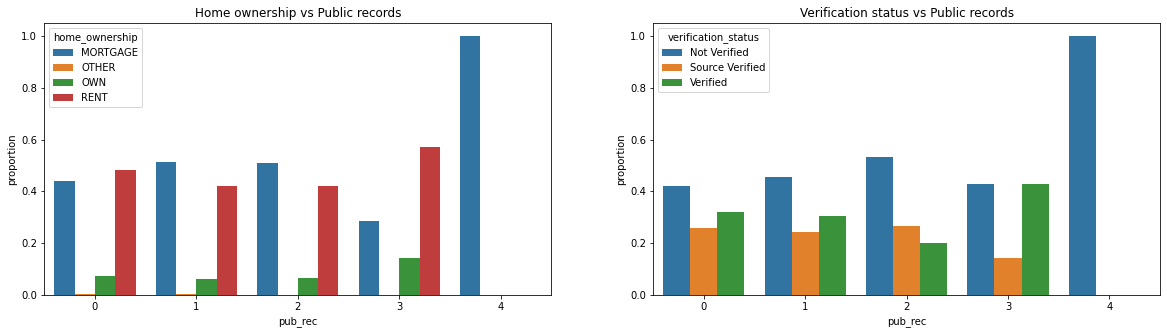

In [85]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = loan.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = loan.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records');

**Observations**:  
- Borrowers with 4 public Derogatory records are high in mortgage owned house category and also Not verified Catogry of verification status.

C:\Users\adity\AppData\Local\Temp/ipykernel_10128/2306806440.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'loan status vs Public records')

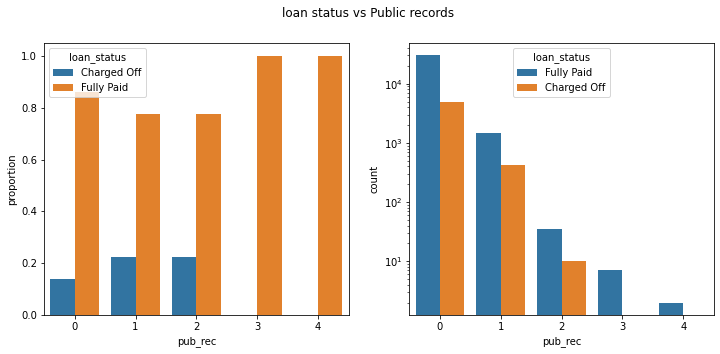

In [86]:
#Proportion of values for each category
df = loan.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

plt.subplot(122)
sns.countplot(loan.pub_rec, hue='loan_status', data=loan)
plt.yscale('log')
plt.suptitle('loan status vs Public records')

**Observations**:  
- The there is increase in deafulted loans for people with derogatory records from 0 to 2 but it is not there for pub_rec 3 adn 4, this is because there very few people took loans in those pub_rec numbers where are as from most borrowers are in 0 pub_rec category.

### <font color= brown> Bivariate Analysis

#### Correlation Matrix

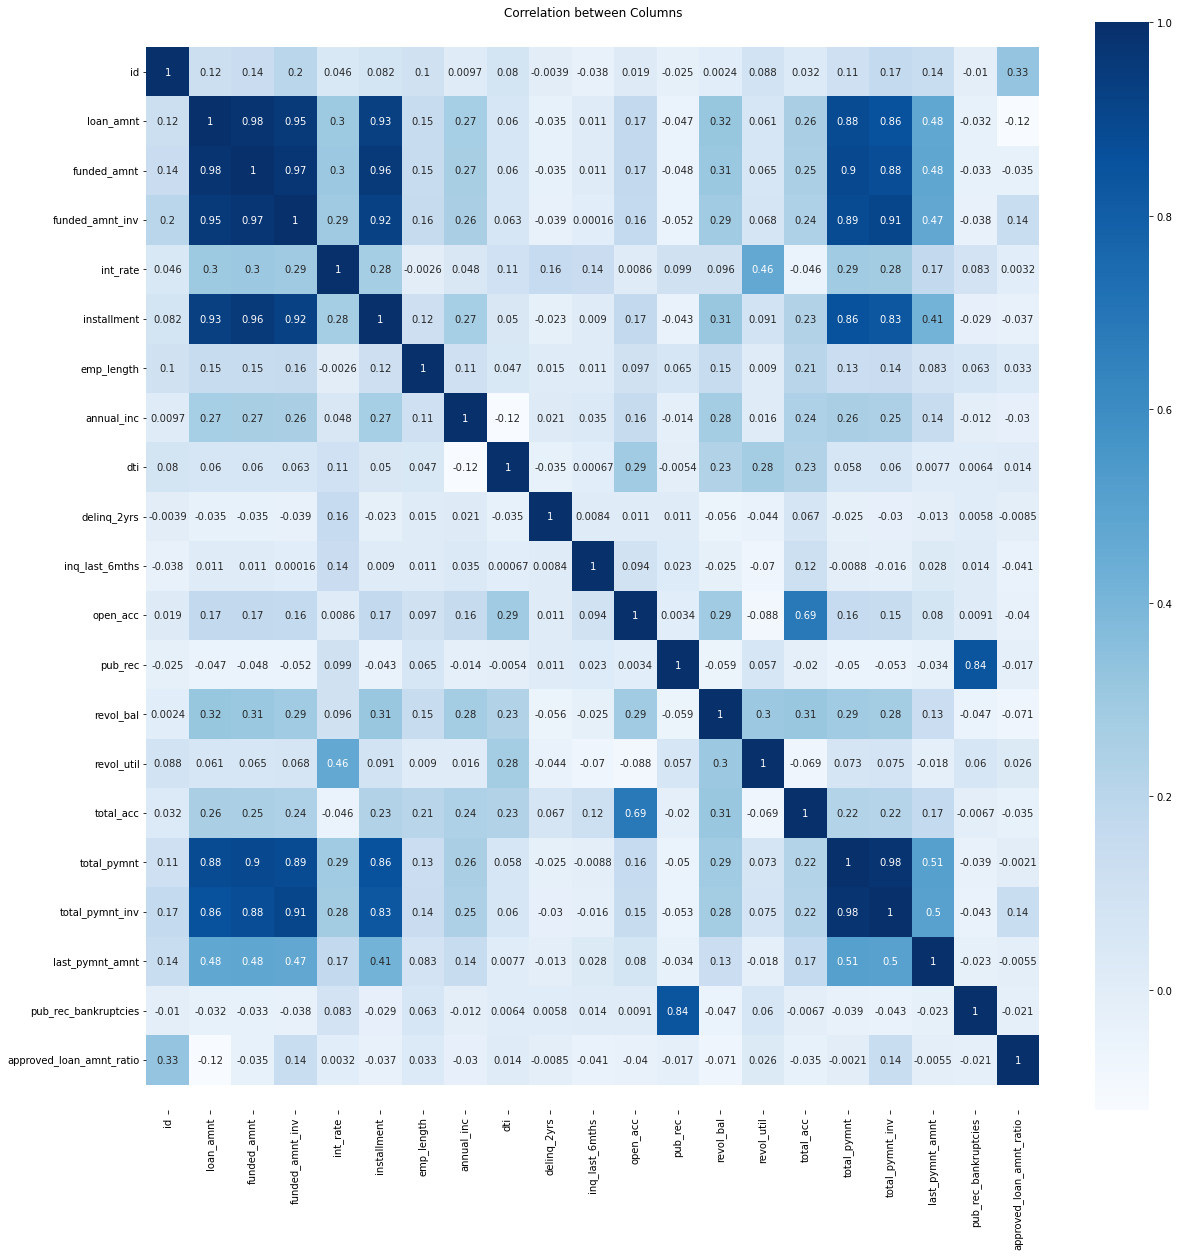

In [87]:
#Finding correlation matric
corr_matrix = loan.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

**Observations**:  
- The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.   
- Interest rates are high for people with high revol utilisation.

#### Term vs Loan Status

C:\Users\adity\AppData\Local\Temp/ipykernel_10128/2362639665.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())


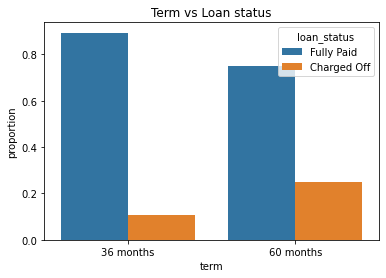

In [88]:
#Proportion of values for each category
df = loan.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status');

**Observations**:  
- More proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

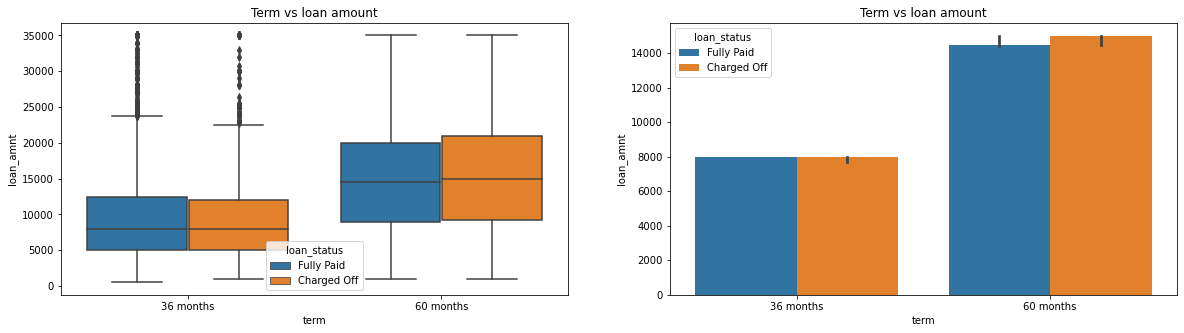

In [89]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations**:  
- Loan amount is not a decider for defaults in both 36 adn 60 months.   
- Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

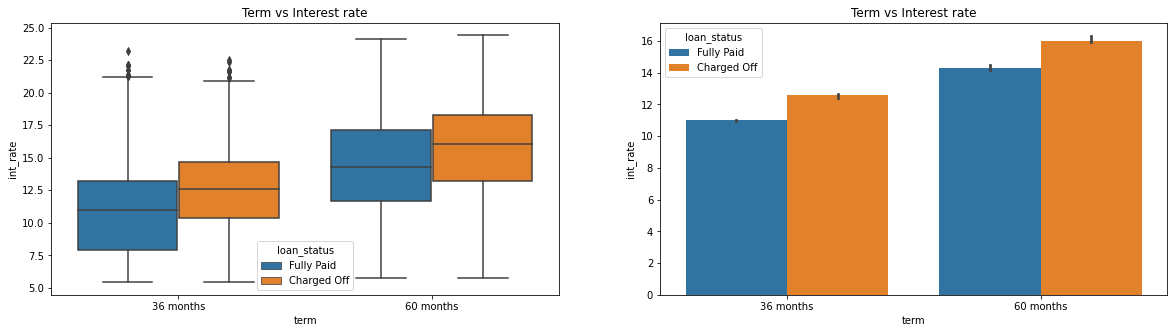

In [90]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

**Observations**  
- For higher interest rates the default rate is higher in both 36 and 60 months tenure.

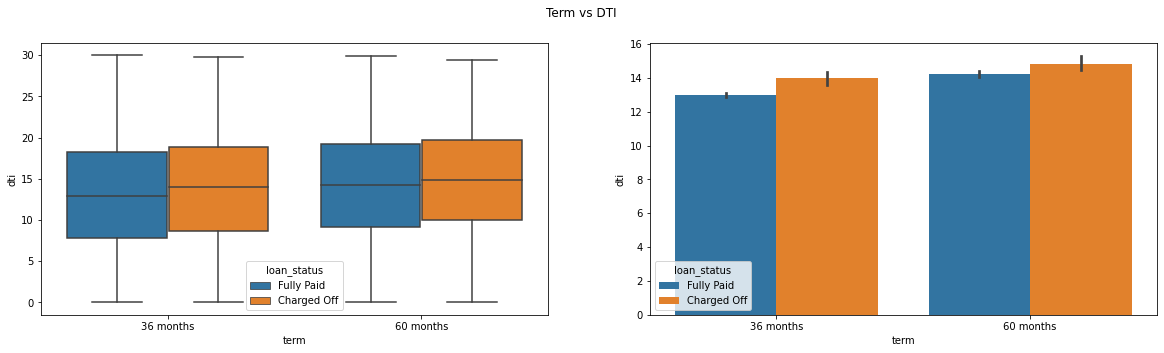

In [91]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

**Observations:**  
- Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

#### Grade

In [92]:
#Sorting Grades from A to G
grade_ord = loan.grade.unique()
grade_ord.sort()

C:\Users\adity\AppData\Local\Temp/ipykernel_10128/24719107.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())


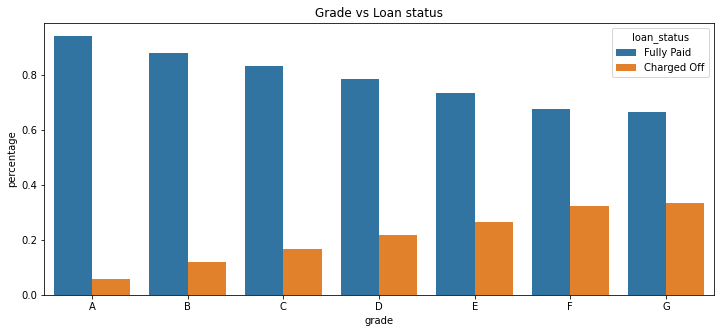

In [93]:
df = loan.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status');

**Observations:**  
- The above graph clearly says the Charged off increases as grades decreases.

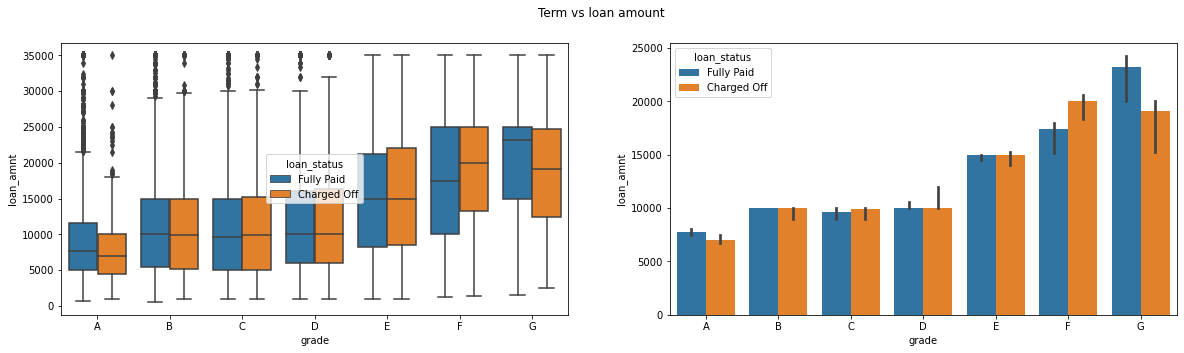

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

**Observations:**  
- For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.  
- The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

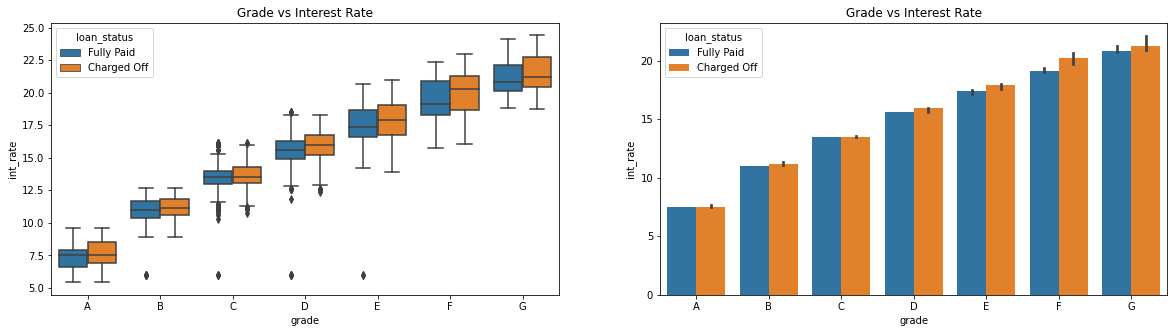

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

**Observations:**  
- As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.

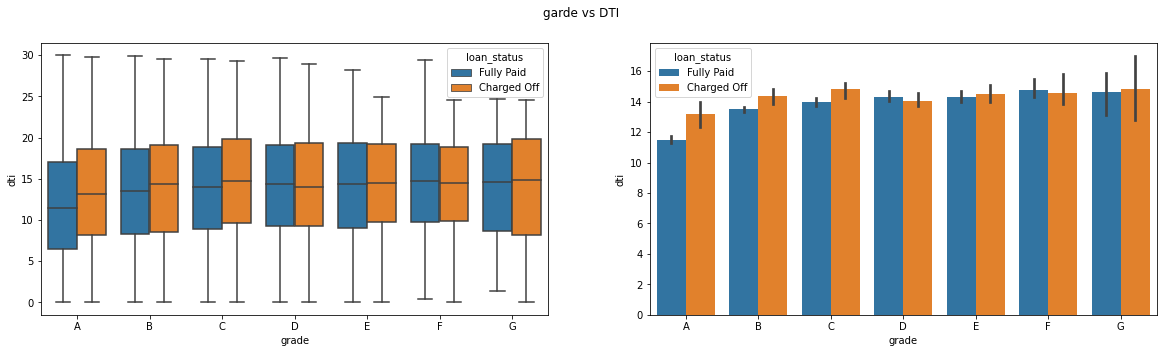

In [96]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=loan, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=loan, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

**Observations:**  
- There is not much change in dti in each grade and loan status.

#### Employment Length

C:\Users\adity\AppData\Local\Temp/ipykernel_10128/3299183150.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())


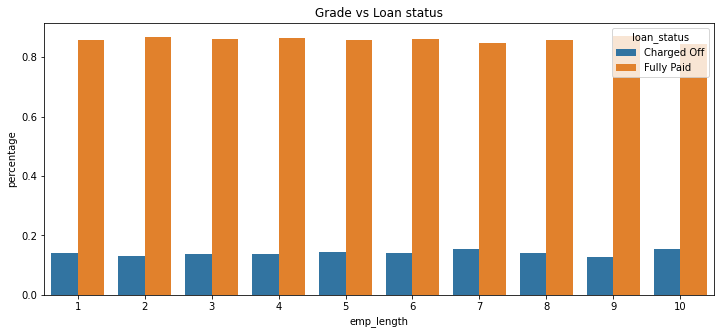

In [97]:
df = loan.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status');

**Observations:**
- There is not big changes or pattern observed defaulters across employment lengths.

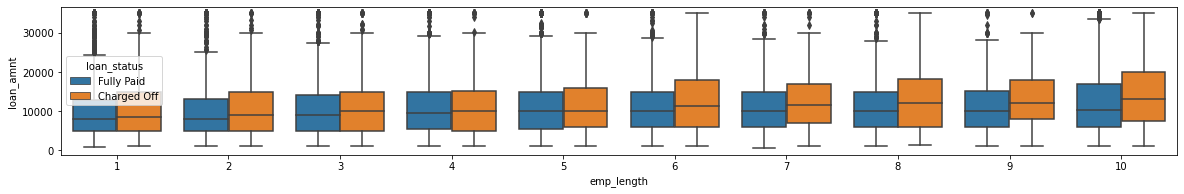

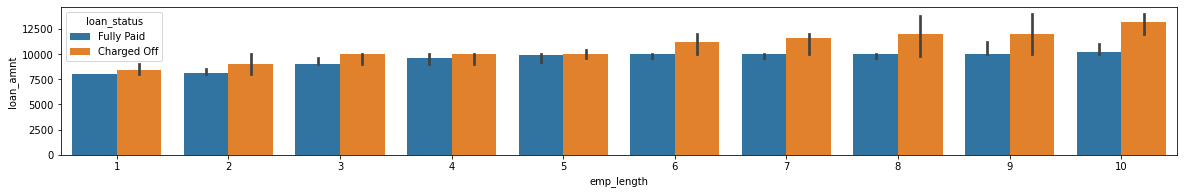

In [98]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.show()

**Observations:**  
- Borrowers with higher employment lengths and took more loan amounts got more default rate.

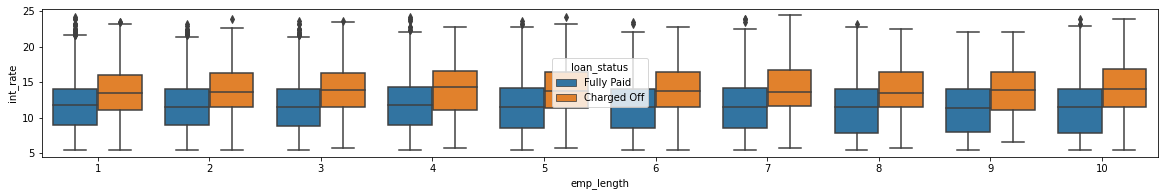

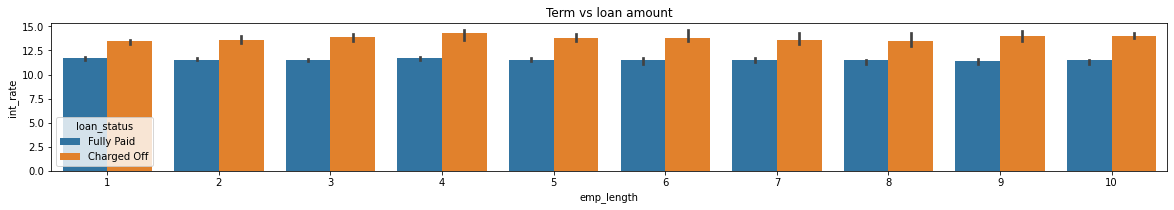

In [99]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=loan)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations**:  
- Irrespictive of employment length loans with more interest rates got defaulted more.

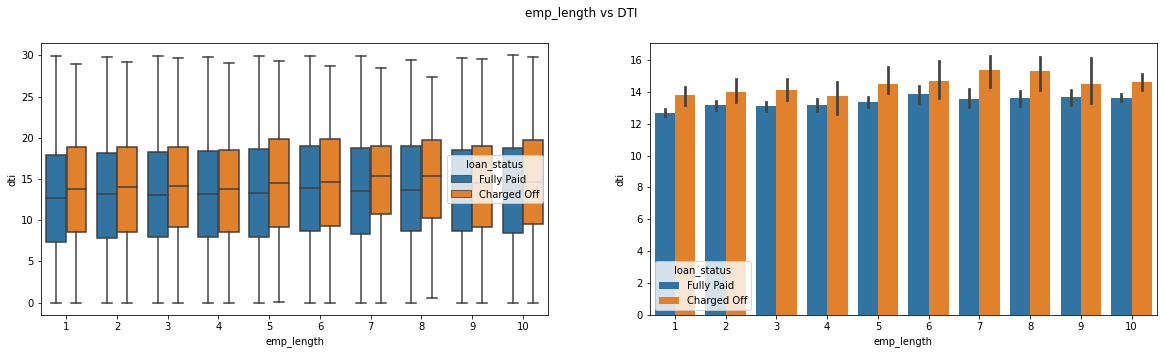

In [100]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

**Observations:**  
- Employment Length and DTI are not showing any patterns towards defaults.

#### Verfication Status

C:\Users\adity\AppData\Local\Temp/ipykernel_10128/679967841.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())


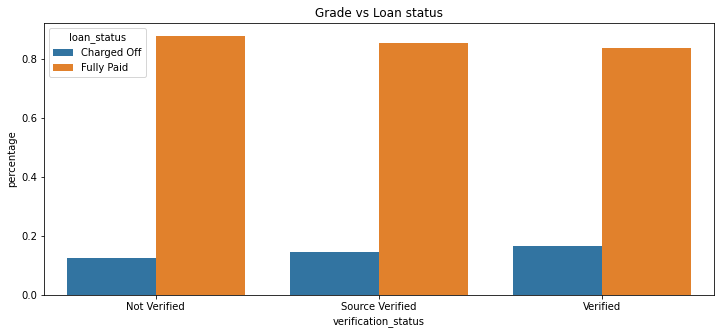

In [101]:
df = loan.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status');

**Observations:**  
- There isn't big change in charged of loans for all varification status.

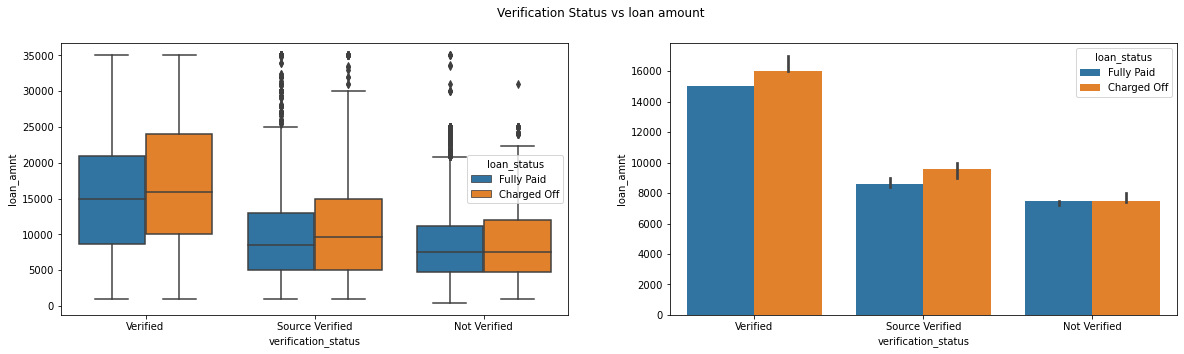

In [102]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

**Observations:**  
- Verified loans are given more loan amounts compared to others.
- There is a slight increase in loan amount for verified and source verified loan when they are defaulted.

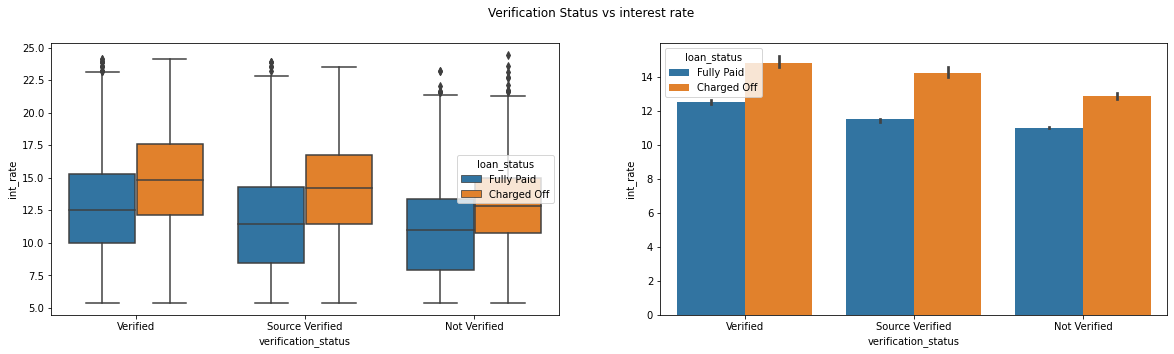

In [103]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

**Observations:**  
- Irrespective of verification status higher interest rates are incurring default of loan.

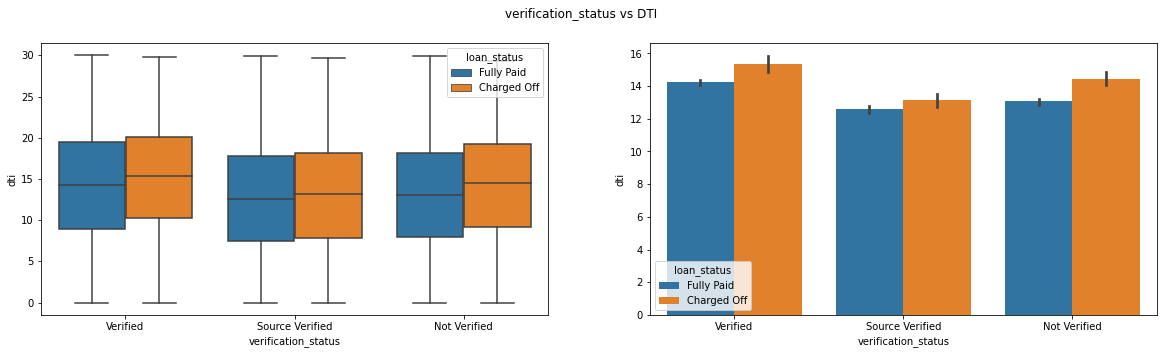

In [104]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

**Observations:**  
- There is slight increase in the dti mean for defaulted laons for all the verification status categories.

#### Purpose

C:\Users\adity\AppData\Local\Temp/ipykernel_10128/2388790482.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

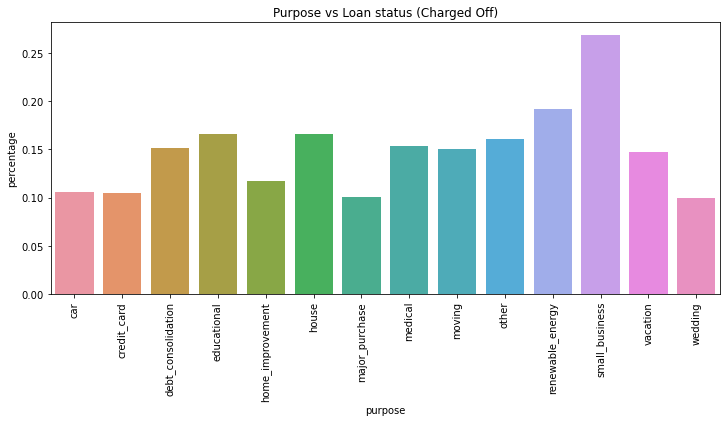

In [105]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

**Observations:**  
- Charged-off are higher for small_business comparitively.

<Figure size 432x288 with 0 Axes>

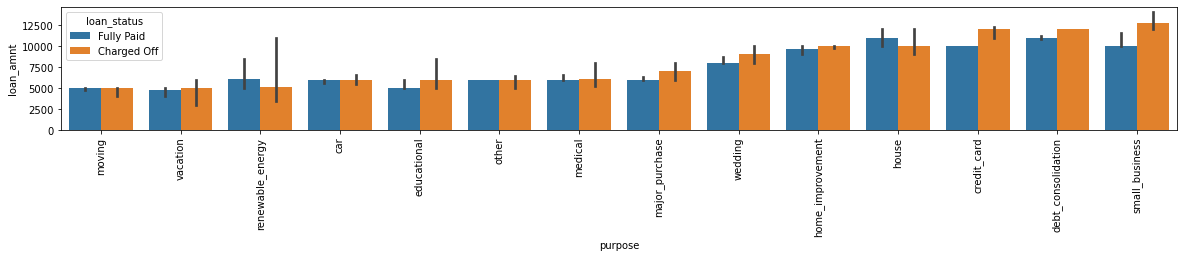

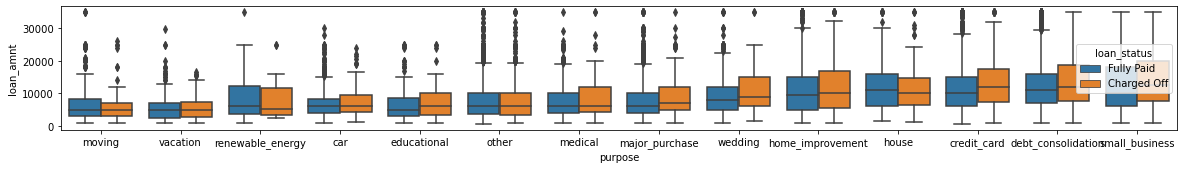

In [106]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

**Observations:**  
- Small Business has more defaults when the loan amount is also high.

<Figure size 432x288 with 0 Axes>

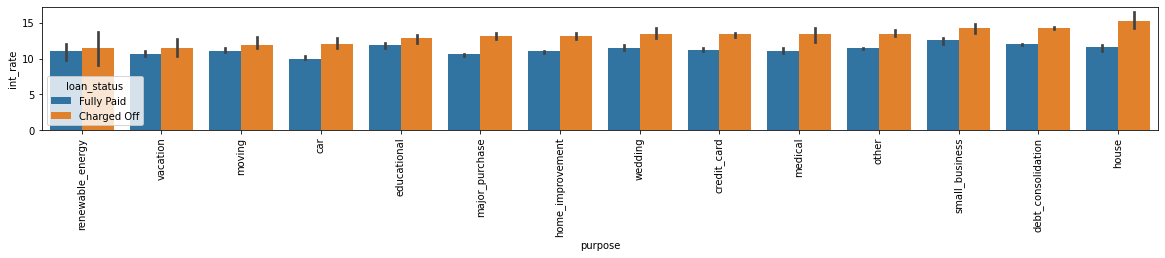

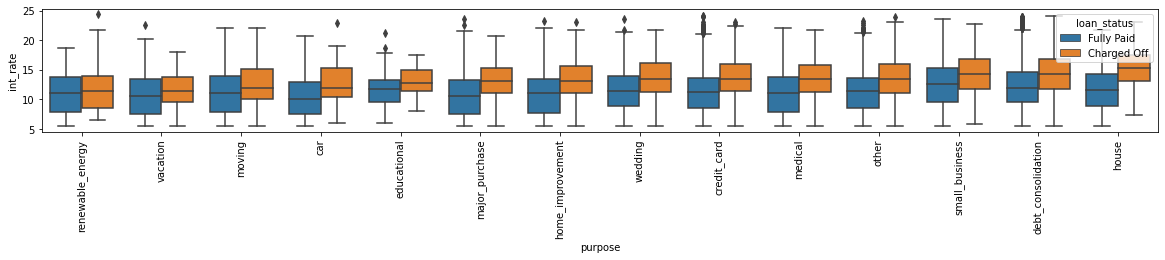

In [107]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= loan, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= loan, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**  
- Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

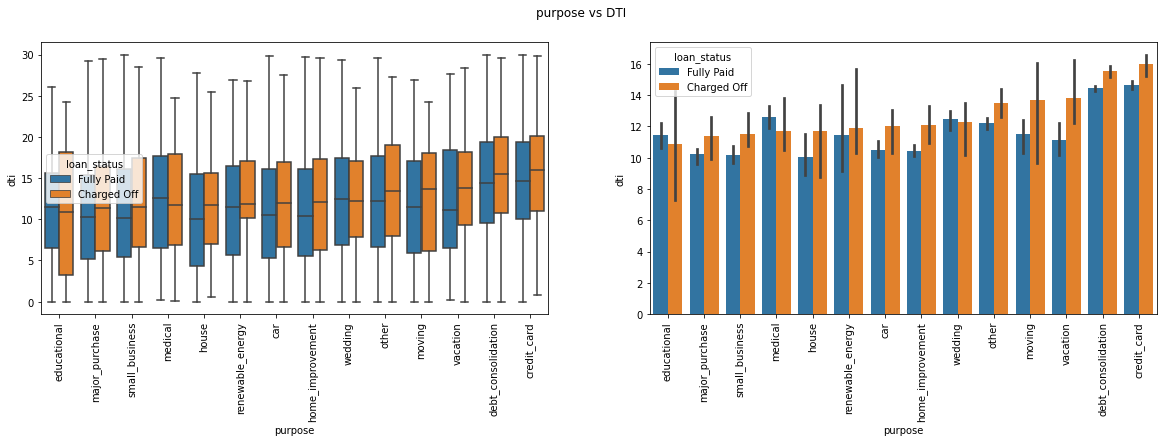

In [108]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=loan, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=loan, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**  
- Could not observe any pattern from the charts

#### Loan Amount vs Interest Rate

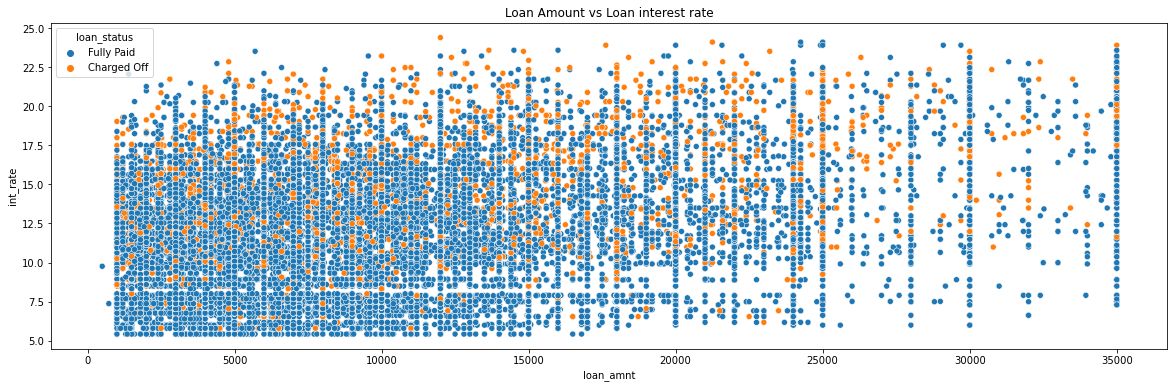

In [109]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

**Observartions**:  
- Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

#### Loan Amount vs Annual income

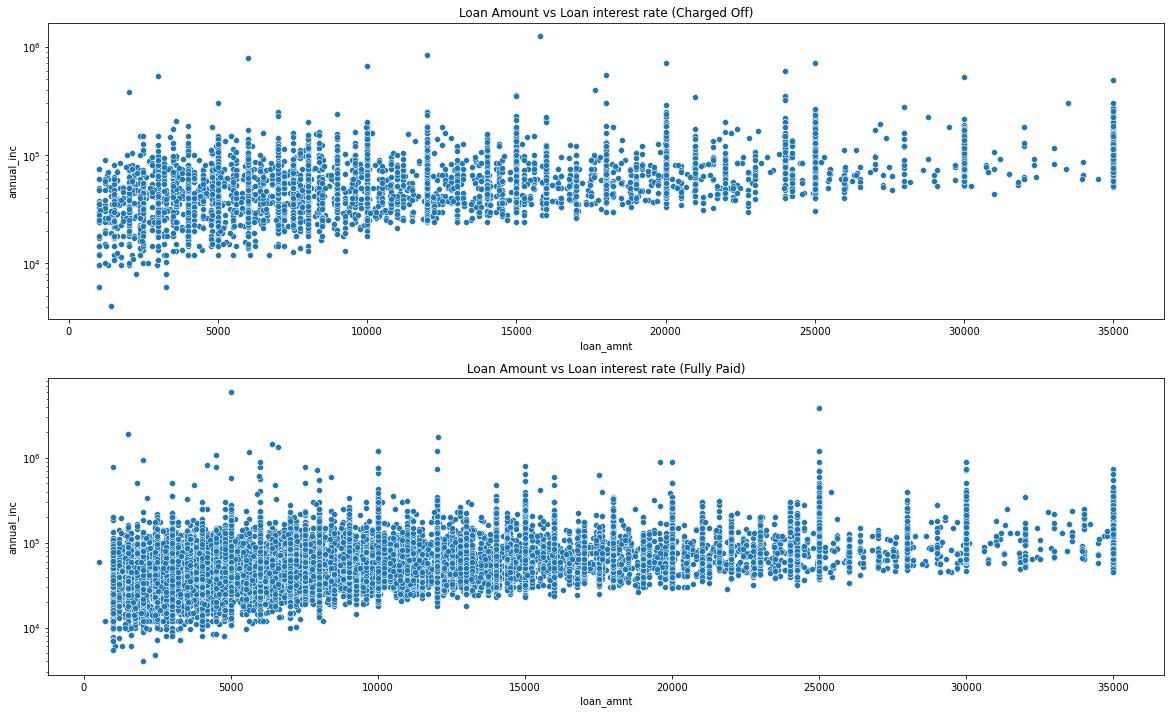

In [110]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan[loan.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan[loan.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

**Observations**  
- Both Fully paid and Charged Off loans are having similar pattern versus Annual income. We can fit a linear patter with a line which has very much less slope.

#### Loan Amount vs DTI

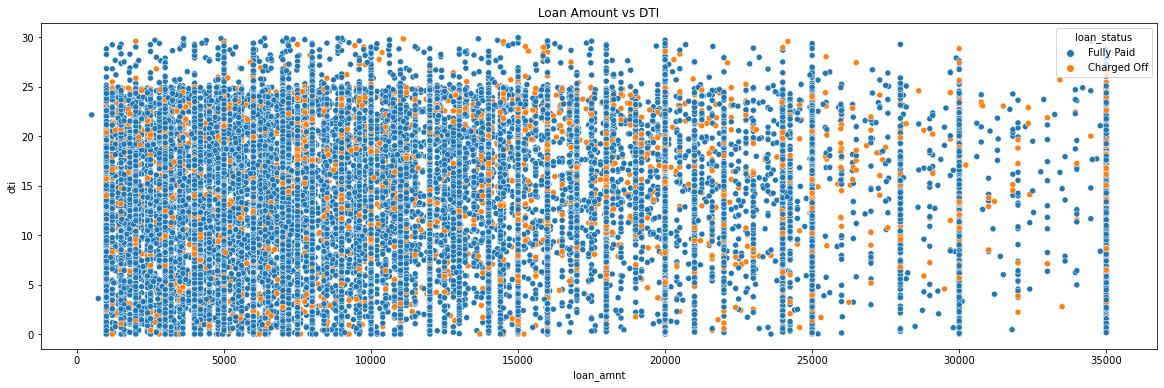

In [111]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=loan, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

**Observartions**:  
- Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

#### Interest Rate vs DTI

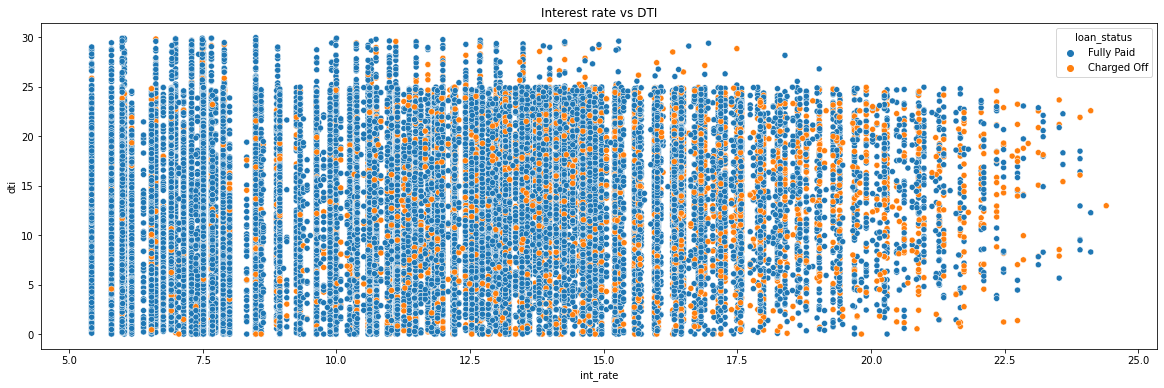

In [112]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=loan, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

**Observations**  
- Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.

#### State wise defaulters

Text(0.5, 1.0, 'Address State vs Charged Off')

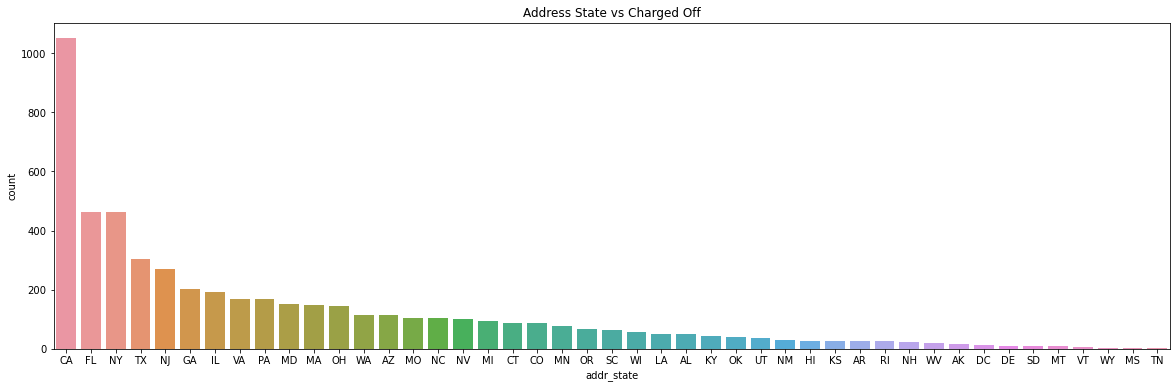

In [113]:
charged_off_df = loan[loan.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

**Observations**  
- More number of borrowers defaulted in _CA_ , _FL_ and _NY_ states.

## <font color=green> Recommendations

1. Lending Club should avoid to give loan for longer term that is for 60 months


2. To avoid more defaulter the interest should not be high, High interest rate have more tendency of getting loan charged off


3. Lending Club should resist to provide a loan to lower grades as it have higher chances of default


4. The employee who have higher length of employment are more prone to default loan, Lending club should consider the this parameter as it gave more loan to them


5. Lending Club should avoid to give loan to the smaller business as they defaulted most


6. More number of borrowers defaulted in CA , FL and NY states, there should be more scrutiny to the borrower of that state


Name - Aditya Anil Regundwar
